In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import where as IF

# Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claim=pd.read_csv("claims.csv")
claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,27-11-2017,Auto,No,Material only,$2980,1.0,No
1,9476314,65176092,Other causes,01-01-2017,Auto,No,Material and injury,$37290,3.0,No
2,23636125,64840478,Other driver error,01-01-2017,Auto,Unknown,Material and injury,$17290,1.0,No
3,25647821,74155265,Natural causes,01-01-2017,Auto,No,Material only,$2080,1.0,No
4,36457152,25634799,Driver error,01-01-2017,Auto,No,Material only,$2900,2.0,No


In [3]:
claim.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [4]:
demo=pd.read_csv("cust_demographics.csv")
demo

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [5]:
demo.isnull().sum()

CUST_ID        0
gender         0
DateOfBirth    0
State          0
Contact        0
Segment        0
dtype: int64

In [6]:
df360 = pd.merge(right = claim,
                   left = demo, 
                   right_on = "customer_id", 
                   left_on = "CUST_ID",
                   how = "left"
                  )
df360

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,27-11-2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10-03-2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02-02-2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04-04-2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,91609100.0,47830476.0,Natural causes,04-12-2017,Auto,Unknown,Material only,$1440,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09-06-2018,Auto,Yes,Material only,$1770,1.0,No
1088,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05-09-2017,Home,No,Material only,$2800,1.0,No
1089,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,15-05-2017,Auto,Yes,Injury only,$33080,2.0,No
1090,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,18-04-2017,Auto,No,Material only,$2840,4.0,No


In [7]:
df360.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
customer_id             7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
dtype: int64

# Exploratory Data Analysis

In [8]:
print(claim.shape)
print(demo.shape)
print(df360.shape)

(1100, 10)
(1085, 6)
(1092, 16)


In [9]:
df360

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,27-11-2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10-03-2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02-02-2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04-04-2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,91609100.0,47830476.0,Natural causes,04-12-2017,Auto,Unknown,Material only,$1440,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09-06-2018,Auto,Yes,Material only,$1770,1.0,No
1088,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05-09-2017,Home,No,Material only,$2800,1.0,No
1089,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,15-05-2017,Auto,Yes,Injury only,$33080,2.0,No
1090,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,18-04-2017,Auto,No,Material only,$2840,4.0,No


In [10]:
df360.drop(columns = ["customer_id"], inplace = True)

In [11]:
df360

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,27-11-2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10-03-2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02-02-2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04-04-2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,91609100.0,Natural causes,04-12-2017,Auto,Unknown,Material only,$1440,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,Other driver error,09-06-2018,Auto,Yes,Material only,$1770,1.0,No
1088,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,Other causes,05-09-2017,Home,No,Material only,$2800,1.0,No
1089,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,Other driver error,15-05-2017,Auto,Yes,Injury only,$33080,2.0,No
1090,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,Other driver error,18-04-2017,Auto,No,Material only,$2840,4.0,No


# Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance

In [12]:
df360["DateOfBirth"] = pd.to_datetime(df360.DateOfBirth, format = "%d-%b-%y")
df360.loc[(df360.DateOfBirth.dt
             .year > 2020),"DateOfBirth"]=df360[df360.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

In [13]:
df360["claim_date"] = pd.to_datetime(df360["claim_date"], format="%d-%m-%Y")

In [14]:
df360.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-03-10,Home,Unknown,Material only,$2980,3.0,No


# Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [15]:
df360["claim_amount"] = pd.to_numeric(df360.claim_amount.str.replace("$",""),downcast='float')

In [16]:
df360

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-03-10,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,91609100.0,Natural causes,2017-12-04,Auto,Unknown,Material only,1440.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796.0,Other driver error,2018-06-09,Auto,Yes,Material only,1770.0,1.0,No
1088,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067.0,Other causes,2017-09-05,Home,No,Material only,2800.0,1.0,No
1089,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No
1090,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No


In [17]:
df360["Contact"] = df360.Contact.str.replace("-","")

In [18]:
df360.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                      float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims           float64
fraudulent                     object
dtype: object

In [19]:
df360

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796.0,Crime,2018-03-10,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,7986314758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7986314758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,4131877945,Silver,91609100.0,Natural causes,2017-12-04,Auto,Unknown,Material only,1440.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,1981-03-15,ND,4594254319,Platinum,62020796.0,Other driver error,2018-06-09,Auto,Yes,Material only,1770.0,1.0,No
1088,42364152,Female,1996-07-07,ID,5294621635,Silver,63269067.0,Other causes,2017-09-05,Home,No,Material only,2800.0,1.0,No
1089,19888166,Male,1990-04-11,WI,7126519613,Gold,22690595.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No
1090,11256802,Female,1964-10-22,LA,4693455617,Silver,12376894.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No


# 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [20]:
df360["alert"] = IF(df360.police_report == "No", 0 ,
                    IF(df360.police_report == "Yes", 1, np.nan))


# 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column

In [21]:
df360["CUST_ID"].duplicated().sum()

7

In [22]:
df360 = df360.groupby('CUST_ID').first().reset_index(drop = True)

# Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [23]:
cat_col = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","alert"]
con_col = ["claim_amount",'total_policy_claims']

In [24]:
for col in cat_col:
    df360[col] = df360[col].fillna(df360[col].mode()[0])
df360[con_col] = df360[con_col].fillna(df360[con_col].mean())
df360.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert
0,Female,1978-05-23,DE,9628791238,Platinum,69348631.0,Driver error,2018-10-04,Auto,No,Injury only,12492.532227,1.0,Yes,0.0
1,Male,1972-12-20,TX,1738926314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0
2,Male,1988-07-28,FL,3645981549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.0
3,Male,1971-08-19,CA,1873488375,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.0
4,Female,1980-08-10,NC,7988625398,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.0


In [25]:
df360['AGE'] = (df360["claim_date"]-df360["DateOfBirth"]).astype('<m8[Y]')

In [26]:
df360

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert,AGE
0,Female,1978-05-23,DE,9628791238,Platinum,69348631.0,Driver error,2018-10-04,Auto,No,Injury only,12492.532227,1.0,Yes,0.0,40.0
1,Male,1972-12-20,TX,1738926314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0,45.0
2,Male,1988-07-28,FL,3645981549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.0,29.0
3,Male,1971-08-19,CA,1873488375,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.0,46.0
4,Female,1980-08-10,NC,7988625398,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,1965-01-28,UT,5175624916,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0.0,53.0
1081,Female,1966-06-19,HI,4577521374,Gold,35453672.0,Natural causes,2018-06-01,Auto,Yes,Material and injury,14360.000000,1.0,No,1.0,51.0
1082,Female,1963-11-18,NC,6432464718,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0.0,54.0
1083,Male,1995-06-08,OR,3952466172,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,0.0,22.0


In [27]:
df360["Age_grp"] = IF(df360.AGE < 18, "Children",
                        IF(df360.AGE< 30, "Youth",
                         IF(df360.AGE< 60, "Adult",
                          IF(df360.AGE < 100, "Senior", "NaN"
                           
                          )
                         )
                        )
                       )

In [28]:
df360

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert,AGE,Age_grp
0,Female,1978-05-23,DE,9628791238,Platinum,69348631.0,Driver error,2018-10-04,Auto,No,Injury only,12492.532227,1.0,Yes,0.0,40.0,Adult
1,Male,1972-12-20,TX,1738926314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0,45.0,Adult
2,Male,1988-07-28,FL,3645981549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.0,29.0,Youth
3,Male,1971-08-19,CA,1873488375,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.0,46.0,Adult
4,Female,1980-08-10,NC,7988625398,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.0,37.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,1965-01-28,UT,5175624916,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0.0,53.0,Adult
1081,Female,1966-06-19,HI,4577521374,Gold,35453672.0,Natural causes,2018-06-01,Auto,Yes,Material and injury,14360.000000,1.0,No,1.0,51.0,Adult
1082,Female,1963-11-18,NC,6432464718,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0.0,54.0,Adult
1083,Male,1995-06-08,OR,3952466172,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,0.0,22.0,Youth


In [29]:
df360["AGE"].isna().sum()

7

In [30]:
df360["Age_grp"] = df360["Age_grp"].fillna(df360["Age_grp"].mode())

In [31]:
df360["Age_grp"].isna().sum()

0

In [32]:
df360.groupby(by = "Age_grp").count()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert,AGE
Age_grp,,,,,,,,,,,,,,,,
Adult,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745
Children,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
NaN,7,7,7,7,7,0,7,0,7,0,7,7,7,7,7,0
Youth,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324


# What is the average amount claimed by the customers from various segments?

In [33]:
df360.groupby(by = "Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12817.718750
Platinum,12371.228516
Silver,12272.432617


# What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [34]:
df360.loc[df360.claim_date <"2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("net_")

incident_cause
net_Crime                 6.561927e+05
net_Driver error          3.292050e+06
net_Natural causes        1.280554e+06
net_Other causes          3.568400e+06
net_Other driver error    3.314123e+06
Name: claim_amount, dtype: float32

# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes

In [35]:
df360.loc[(df360.incident_cause.str.lower().str.contains("driver") 
             & ((df360.State == "TX") | (df360.State == "DE") | (df360.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

# Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [36]:
f1 = df360.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()
f1.head()

,gender,Segment,claim_amount
0,Female,Gold,2122454.25
1,Female,Platinum,2382150.25
2,Female,Silver,1936082.50
3,Male,Gold,2645737.00
4,Male,Platinum,2120976.75


In [37]:
pv= f1.pivot(index = "Segment", columns = "gender", values = "claim_amount")
pv

gender,Female,Male
Segment,,
Gold,2122454.25,2645737.00
Platinum,2382150.25,2120976.75
Silver,1936082.50,2346996.50


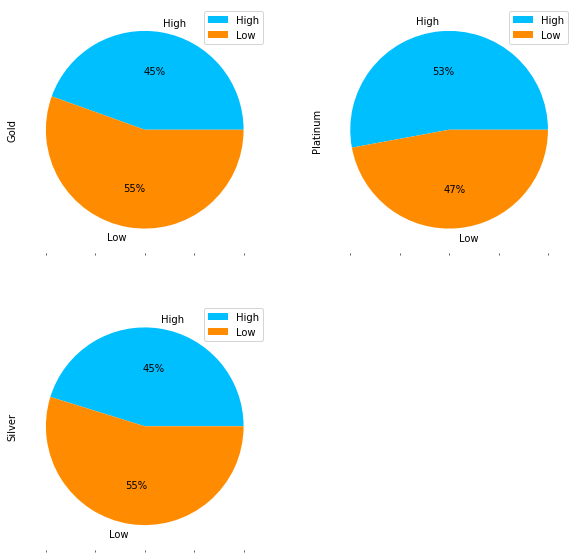

In [38]:
pv.T.plot(kind='pie', 
            labels=['High', 'Low'], 
            colors=['deepskyblue', 'darkorange'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()

# Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [39]:
g1 =df360.loc[(df360.incident_cause.str.lower().str.contains("driver"))].groupby(by = "gender")[["gender"]].count().add_prefix("CountOf_").reset_index()
g1

,gender,CountOf_gender
0,Female,221
1,Male,281


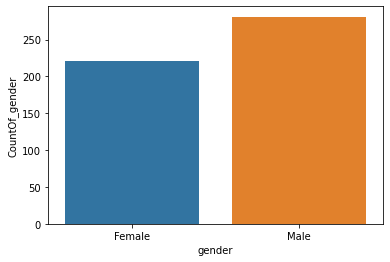

In [40]:
sns.barplot(x = "gender", y = "CountOf_gender", data = g1 )
plt.show()

# Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [41]:
df360.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert,AGE,Age_grp
0,Female,1978-05-23,DE,9628791238,Platinum,69348631.0,Driver error,2018-10-04,Auto,No,Injury only,12492.532227,1.0,Yes,0.0,40.0,Adult
1,Male,1972-12-20,TX,1738926314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0,45.0,Adult
2,Male,1988-07-28,FL,3645981549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.0,29.0,Youth
3,Male,1971-08-19,CA,1873488375,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.0,46.0,Adult
4,Female,1980-08-10,NC,7988625398,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.0,37.0,Adult


In [42]:
f=df360[df360.fraudulent=='Yes']
f

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert,AGE,Age_grp
0,Female,1978-05-23,DE,9628791238,Platinum,69348631.0,Driver error,2018-10-04,Auto,No,Injury only,12492.532227,1.0,Yes,0.0,40.0,Adult
1,Male,1972-12-20,TX,1738926314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0,45.0,Adult
2,Male,1988-07-28,FL,3645981549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.0,29.0,Youth
9,Female,1960-07-29,OR,7367259481,Silver,50906515.0,Crime,2018-08-23,Auto,No,Material only,2507.000000,5.0,Yes,0.0,58.0,Adult
13,Female,1966-06-08,ID,3785871687,Platinum,4881066.0,Crime,2018-03-21,Home,No,Material only,2369.000000,1.0,Yes,0.0,51.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,Female,1989-09-10,NJ,3423129723,Gold,70156112.0,Driver error,2018-03-06,Auto,Unknown,Material and injury,20033.000000,3.0,Yes,0.0,28.0,Youth
1077,Female,1993-11-11,ID,8234825839,Platinum,17871003.0,Other driver error,2018-09-19,Auto,Unknown,Material only,3139.500000,3.0,Yes,0.0,24.0,Youth
1078,Female,1985-12-30,KY,7644399856,Gold,74165873.0,Other driver error,2018-01-13,Home,No,Material only,1495.000000,1.0,Yes,0.0,32.0,Adult
1082,Female,1963-11-18,NC,6432464718,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0.0,54.0,Adult


In [43]:
g2 = f.groupby((["Age_grp","fraudulent"]))["fraudulent"].count()
g2

Age_grp   fraudulent
Adult     Yes           173
Children  Yes             2
Youth     Yes            72
Name: fraudulent, dtype: int64

In [44]:
g2= g2.unstack(level=0)
g2

Age_grp,Adult,Children,Youth
fraudulent,,,
Yes,173,2,72


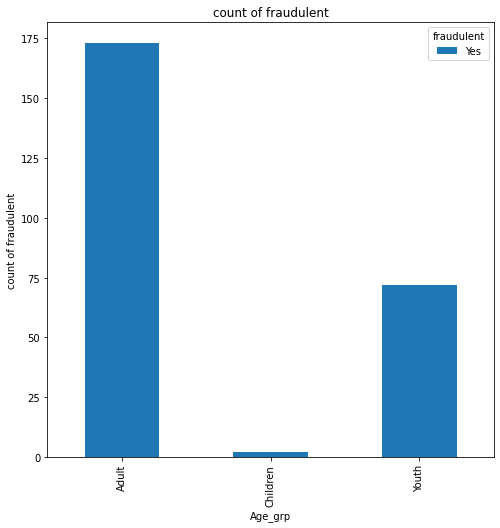

In [45]:
g2.T.plot(kind="bar",figsize=(8,8),width=0.5)
plt.ylabel("count of fraudulent")
plt.title("count of fraudulent")
plt.show()

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [46]:
df360['Month'] = df360['claim_date'].dt.month

In [47]:
df360

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert,AGE,Age_grp,Month
0,Female,1978-05-23,DE,9628791238,Platinum,69348631.0,Driver error,2018-10-04,Auto,No,Injury only,12492.532227,1.0,Yes,0.0,40.0,Adult,10.0
1,Male,1972-12-20,TX,1738926314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0,45.0,Adult,4.0
2,Male,1988-07-28,FL,3645981549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.0,29.0,Youth,10.0
3,Male,1971-08-19,CA,1873488375,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.0,46.0,Adult,3.0
4,Female,1980-08-10,NC,7988625398,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.0,37.0,Adult,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,1965-01-28,UT,5175624916,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0.0,53.0,Adult,7.0
1081,Female,1966-06-19,HI,4577521374,Gold,35453672.0,Natural causes,2018-06-01,Auto,Yes,Material and injury,14360.000000,1.0,No,1.0,51.0,Adult,6.0
1082,Female,1963-11-18,NC,6432464718,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0.0,54.0,Adult,4.0
1083,Male,1995-06-08,OR,3952466172,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,0.0,22.0,Youth,11.0


In [48]:
df360['month_year']=df360['claim_date'].dt.to_period('M')

In [49]:
g3 = df360.groupby((['month_year']))["claim_amount"].sum()
g3

month_year
2017-01    654765.18750
2017-02    593429.06250
2017-03    637793.62500
2017-04    642561.62500
2017-05    583346.12500
2017-06    499450.53125
2017-07    792422.62500
2017-08    423904.53125
2017-09    495411.62500
2017-10    751558.56250
2017-11    642115.62500
2017-12    623506.56250
2018-01    723427.68750
2018-02    394896.53125
2018-03    727446.12500
2018-04    424996.50000
2018-05    384625.09375
2018-06    912044.68750
2018-07    728086.25000
2018-08    370802.00000
2018-09    564996.62500
2018-10    808132.68750
2018-12     87230.00000
Freq: M, Name: claim_amount, dtype: float32

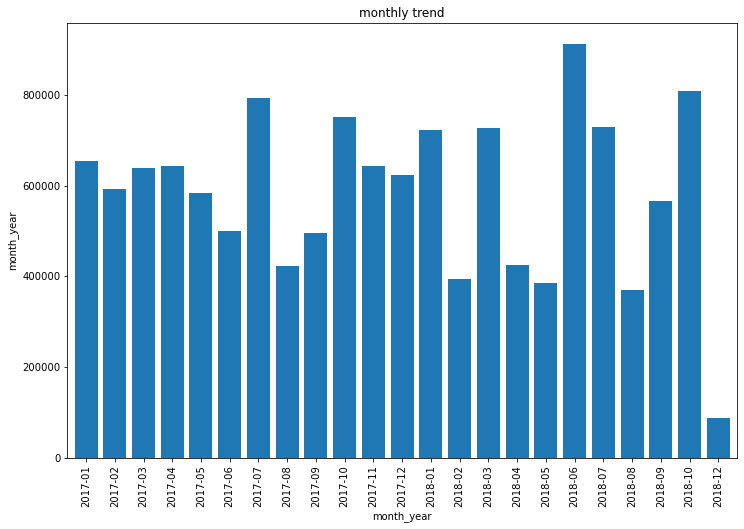

In [50]:
g3.T.plot(kind="bar",figsize=(12,8),width=0.8)
plt.ylabel("month_year")
plt.title("monthly trend")
plt.show()

# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims

In [51]:
g15 = df360.groupby((["fraudulent","Age_grp","gender"]))["claim_amount"].sum()
g15

fraudulent  Age_grp   gender
No          Adult     Female    3.390926e+06
                      Male      3.637301e+06
            Children  Female    2.242000e+04
                      Male      8.366000e+04
            NaN       Female    6.246266e+04
                      Male      2.498506e+04
            Youth     Female    1.569503e+06
                      Male      1.545473e+06
Yes         Adult     Female    1.121720e+06
                      Male      1.416251e+06
            Children  Male      3.482200e+04
            Youth     Female    2.736566e+05
                      Male      3.712191e+05
Name: claim_amount, dtype: float32

In [52]:
g15= g15.unstack(level=0)
g15

fraudulent                 No           Yes
Age_grp  gender                            
Adult    Female  3.390926e+06  1.121720e+06
         Male    3.637301e+06  1.416251e+06
Children Female  2.242000e+04           NaN
         Male    8.366000e+04  3.482200e+04
NaN      Female  6.246266e+04           NaN
         Male    2.498506e+04           NaN
Youth    Female  1.569503e+06  2.736566e+05
         Male    1.545473e+06  3.712191e+05

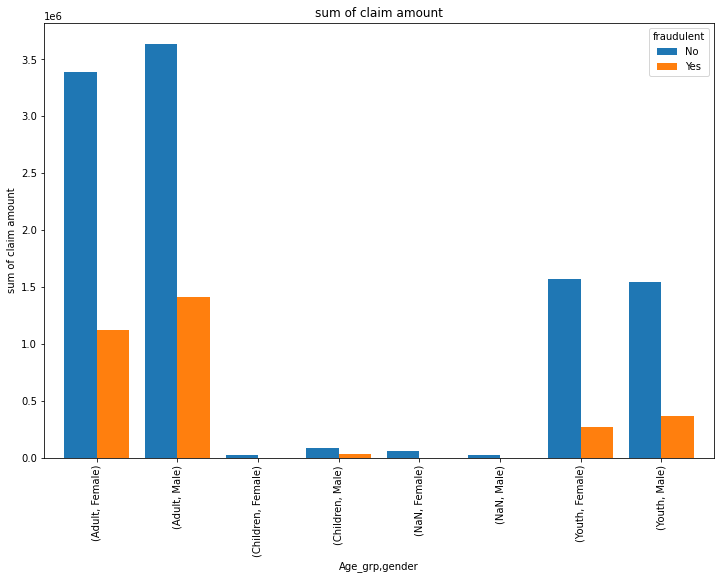

In [53]:
g15.plot(kind="bar",figsize=(12,8),width=0.8)
plt.ylabel("sum of claim amount")
plt.title("sum of claim amount")
plt.show()

# Is there any similarity in the amount claimed by males and females?

In [54]:
import scipy.stats as stats

# ANOVA or f-test

In [55]:
df360

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert,AGE,Age_grp,Month,month_year
0,Female,1978-05-23,DE,9628791238,Platinum,69348631.0,Driver error,2018-10-04,Auto,No,Injury only,12492.532227,1.0,Yes,0.0,40.0,Adult,10.0,2018-10
1,Male,1972-12-20,TX,1738926314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0,45.0,Adult,4.0,2018-04
2,Male,1988-07-28,FL,3645981549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.0,29.0,Youth,10.0,2017-10
3,Male,1971-08-19,CA,1873488375,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.0,46.0,Adult,3.0,2018-03
4,Female,1980-08-10,NC,7988625398,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.0,37.0,Adult,7.0,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,1965-01-28,UT,5175624916,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0.0,53.0,Adult,7.0,2018-07
1081,Female,1966-06-19,HI,4577521374,Gold,35453672.0,Natural causes,2018-06-01,Auto,Yes,Material and injury,14360.000000,1.0,No,1.0,51.0,Adult,6.0,2018-06
1082,Female,1963-11-18,NC,6432464718,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0.0,54.0,Adult,4.0,2018-04
1083,Male,1995-06-08,OR,3952466172,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,0.0,22.0,Youth,11.0,2017-11


In [56]:
g16 = df360.groupby((["gender"]))["gender"].count()
g16

gender
Female    532
Male      553
Name: gender, dtype: int64

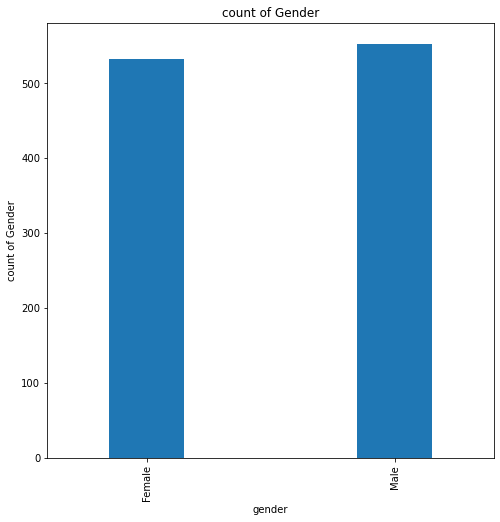

In [57]:
g16.plot(kind="bar",figsize=(8,8),width=0.3)
plt.ylabel("count of Gender")
plt.title("count of Gender")
plt.show()

In [58]:
df360.gender.unique()

array(['Female', 'Male'], dtype=object)

In [59]:
s1 = df360.loc[ df360.gender == 'Female', 'claim_amount']
s2 = df360.loc[ df360.gender == 'Male', 'claim_amount']

In [60]:
print( 'mean s1:', round(s1.mean(), 2), 
          '| mean s2:', round(s2.mean(), 2))

mean s1: 12106.56 | mean s2: 12863.85


In [61]:
print( 'var s1:', round(s1.var(), 2), 
          '| var s2:', round(s2.var(), 2))

var s1: 171197010.0 | var s2: 183693680.0


Ho: No variance in the spend of different gender
Ha: Customers of different gender spend differently
    
CI: 95%, p: 0.05
        
Test: f-test

In [62]:
stats.f_oneway(s1, s2)

F_onewayResult(statistic=0.8757476333347398, pvalue=0.3495776385075301)

# 17. Is there any relationship between age category and segment?

# chi - square test

Ho: No relationship | Both are independent
Ha: Dependent | have relationship
    
CI: 99%, p: 0.01
        
Test: chisquare

In [63]:
obs = pd.crosstab( df360.Age_grp, df360.Segment )
stats.chi2_contingency( obs )

(5.170191190017199,
 0.5221776486056724,
 6,
 array([[255.42857143, 249.93548387, 239.6359447 ],
        [  3.08571429,   3.01935484,   2.89493088],
        [  2.4       ,   2.3483871 ,   2.2516129 ],
        [111.08571429, 108.69677419, 104.21751152]]))

# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [64]:
df360.claim_amount.mean()

12492.533

In [65]:
stats.ttest_1samp( df360.claim_amount, 10000 )

Ttest_1sampResult(statistic=6.161695026307506, pvalue=1.0130657354839666e-09)

# 19. Is there any difference between age groups and insurance claims?

In [66]:
df360.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert,AGE,Age_grp,Month,month_year
0,Female,1978-05-23,DE,9628791238,Platinum,69348631.0,Driver error,2018-10-04,Auto,No,Injury only,12492.532227,1.0,Yes,0.0,40.0,Adult,10.0,2018-10
1,Male,1972-12-20,TX,1738926314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0.0,45.0,Adult,4.0,2018-04
2,Male,1988-07-28,FL,3645981549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0.0,29.0,Youth,10.0,2017-10
3,Male,1971-08-19,CA,1873488375,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1.0,46.0,Adult,3.0,2018-03
4,Female,1980-08-10,NC,7988625398,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0.0,37.0,Adult,7.0,2018-07


In [67]:
g19 = df360.groupby((["Age_grp"]))["Age_grp"].count()
g19

Age_grp
Adult       745
Children      9
NaN           7
Youth       324
Name: Age_grp, dtype: int64

In [68]:
df360.Age_grp.unique()

array(['Adult', 'Youth', 'Children', 'NaN'], dtype=object)

In [69]:
A= df360.loc[ df360.Age_grp == 'Adult', 'total_policy_claims']
Y= df360.loc[ df360.Age_grp == 'Youth', 'total_policy_claims']
C= df360.loc[ df360.Age_grp == 'Children','total_policy_claims']

In [70]:
print( 'mean A:', round(A.mean(), 2), 
          '| mean Y:', round(Y.mean(), 2), 
              '| mean C:', round(C.mean(), 2))

mean A: 1.56 | mean Y: 1.64 | mean C: 1.67


In [71]:
print( 'var A:', round(A.var(), 2), 
          '| var Y:', round(Y.var(), 2), 
              '| var C:', round(C.var(), 2))

var A: 1.14 | var Y: 1.62 | var C: 1.25


In [72]:
stats.f_oneway(A, Y, C)

F_onewayResult(statistic=0.5636364438323981, pvalue=0.5693037657377056)

# 20. Is there any relationship between total number of policy claims and the claimed amount?

# corelation 

Ho: No relationship
Ha: Dependent or have relationship
    
CI: 95%, p-value: 0.05

Test: Pearson Cofficient

In [73]:
stats.pearsonr( df360.total_policy_claims, df360.claim_amount)

(-0.015087844373719036, 0.6195847152423898)

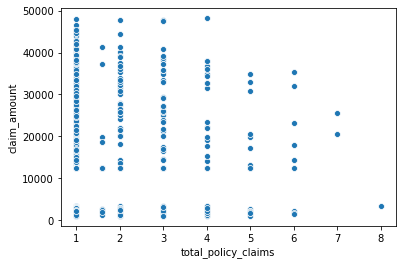

In [74]:
sns.scatterplot( df360.total_policy_claims,df360.claim_amount)
plt.show()